# Digit recognition(0-9)Using SVM

- We need to develop a model that can identify handwritten 0-9 digit . We have pixel value for (0-9) handwritten digit and have to identify digit based upon pixel value

- So Goal is to develop a model that can identify (0-9) handwritten digit based upon pixel value.




- Import Required Libraries

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt, matplotlib.image as mpimg

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')



In [2]:
# Loading the complete dataset
digits = pd.read_csv('C:/Users/goelr/Documents/upgrad/Ass_SVD/train.csv')


### We will perform below steps to build a effective model to identify digits

- Understanding Data 
- Missing value imputation
- Data prepation
- Linear Model
- Non Linear Model
- Chose Optimum Model


#### Understanding Data set

In [3]:
print("Total rows and column of data set: ",digits.shape)
print(digits.info())

Total rows and column of data set:  (42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


##### As  we can see , it is  a very large data  with 42000 rows , so we will take approx 20% data  to build our model

In [4]:
# Selecting 20 % of our main data
sample = digits.sample(frac = 0.20) 
print("Data Shape after 20% data selection : ",sample.shape)
sample.head()

Data Shape after 20% data selection :  (8400, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24692,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5882,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3830,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11658,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6727,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- so We selected 20% of the rows which is 42000*20/100= 8400 

In [5]:
# After Selecting 20% data lets reset the index 
sample = sample.reset_index(drop=True)

In [6]:
# Check the data set again after selecting 20% of the data :-

# Shape
print("Shape: ", sample.shape, "\n")

# data types
print(sample.info())

# head
sample.head()

Shape:  (8400, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 50.3 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Let's check if all the unique labels are present in our sample data or not ?

unique_label = list(np.sort(sample['label'].unique()))
print(unique_label)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


So in our sample data set we have all the digits (0-9)

In [8]:
# Lets check, how many rows we have available for each digit
sample.label.astype('category').value_counts()

1    941
3    909
7    885
9    850
6    829
4    819
2    813
0    813
8    774
5    767
Name: label, dtype: int64

In [9]:
# Check the mean and other data for all the pixel 
digit_means = sample.groupby('label').mean()
digit_means

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.871186,1.520904,0.648588,0.289266,0.311864,0.065537,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [10]:
# Lets check % of rows for each label
100*(round(sample.label.astype('category').value_counts()/len(sample.index), 4))

1    11.20
3    10.82
7    10.54
9    10.12
6     9.87
4     9.75
2     9.68
0     9.68
8     9.21
5     9.13
Name: label, dtype: float64

In [11]:
# Lets check % of rows for each label
100*(round(digits.label.astype('category').value_counts()/len(digits.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

#### in our sample data & complete data set , almost 10% data is present for each rows which is good sample 

(784,)


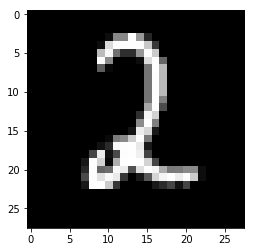

In [12]:
#We can draw the image with the help of pixel and check 
row  = sample.iloc[1,1:]
print(row.shape)
row  = row.values.reshape(28,28)
plt.imshow(row , cmap='gray')

#### We can see , label value  is printed 

In [13]:
# summary statistics for the numerical columns 
sample.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
label,8400.0,4.454286,2.878383,0.0,2.0,4.0,7.0,9.0
pixel0,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel4,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel5,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel6,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel7,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel8,8400.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### Missing value check 

In [14]:
# Find out the Missing value & its Percentage 
total = sample.isnull().sum().sort_values(ascending=False)
print(total)

pixel783    0
pixel267    0
pixel265    0
pixel264    0
pixel263    0
pixel262    0
pixel261    0
pixel260    0
pixel259    0
pixel258    0
pixel257    0
pixel256    0
pixel255    0
pixel254    0
pixel253    0
pixel252    0
pixel251    0
pixel250    0
pixel249    0
pixel248    0
pixel247    0
pixel246    0
pixel245    0
pixel266    0
pixel268    0
pixel390    0
pixel269    0
pixel290    0
pixel289    0
pixel288    0
           ..
pixel495    0
pixel494    0
pixel493    0
pixel492    0
pixel491    0
pixel512    0
pixel513    0
pixel514    0
pixel526    0
pixel535    0
pixel534    0
pixel533    0
pixel532    0
pixel531    0
pixel530    0
pixel529    0
pixel528    0
pixel527    0
pixel525    0
pixel515    0
pixel524    0
pixel523    0
pixel522    0
pixel521    0
pixel520    0
pixel519    0
pixel518    0
pixel517    0
pixel516    0
label       0
Length: 785, dtype: int64


SO we can see there is no  missing records in our data set

#### Data Visualization

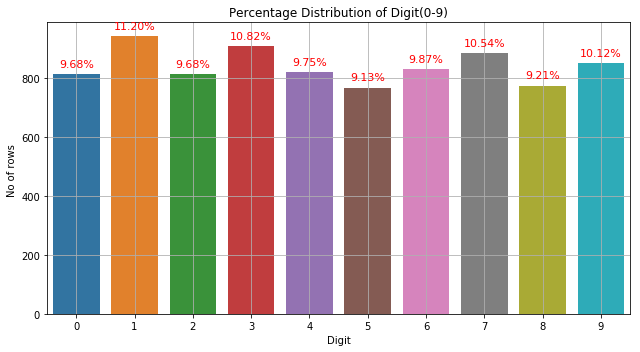

In [15]:
# lets plot for all label in sampel data set
label = sample.label
plt.figure(figsize = [9,5])
g = sns.countplot(x = 'label', data = sample);
plt.ylabel('No of rows ')
plt.xlabel("Digit")
plt.title('Percentage Distribution of Digit(0-9)')
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / sample.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='red', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
plt.tight_layout()
plt.grid(True)

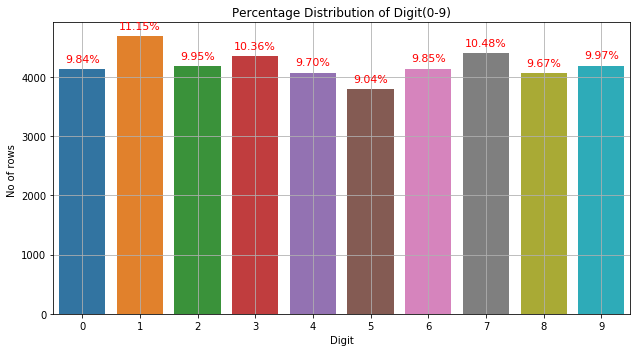

In [16]:
# lets plot for all label in total data set
label = digits.label
plt.figure(figsize = [9,5])
g = sns.countplot(x = 'label', data = digits);
plt.ylabel('No of rows ')
plt.xlabel("Digit")
plt.title('Percentage Distribution of Digit(0-9)')
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / digits.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='red', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
plt.tight_layout()
plt.grid(True)

### Sampel and Total data set has 10% of rows for each digit , that means our sample is good .

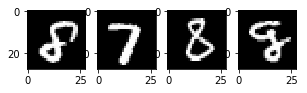

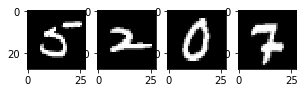

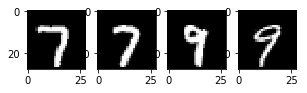

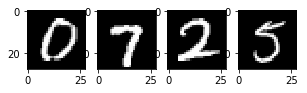

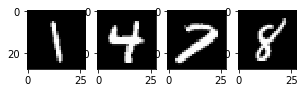

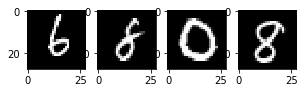

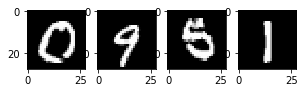

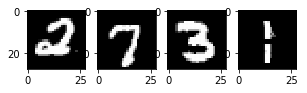

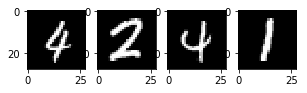

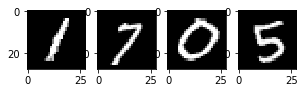

In [17]:
# Lets try to Draw some images which are present in our MNIST data set 
data_1=sample.drop('label',axis=1)
for x in range(0,10):
    train_0=data_1[label==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='gray')

## Data Preparation
- We need to perform below data prepation steps:-

- Split data in X ad Y
- Scaling of data 
- Test train split

In [18]:

# splitting into X and y
X = sample.drop("label", axis = 1)
y = sample['label']

In [19]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

## Model Building



### Linear Model 

In [20]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [21]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9075396825396825 

[[258   0   1   0   1   1   5   1   1   1]
 [  0 276   0   0   0   1   0   0   0   0]
 [  2   1 226   2   2   0   3   0   4   0]
 [  0   2  11 225   1  23   0   1   4   1]
 [  0   2   3   1 250   0   3   1   1   6]
 [  3   5   1  10   5 206   6   0   1   0]
 [  3   2   2   1   1   3 234   0   1   0]
 [  1   2   6   2   4   0   2 230   0   9]
 [  1   3   7  17   3   5   3   2 194   6]
 [  0   1   1   5  11   1   0  11   0 188]]


In [22]:
## Linear SVM Model 
# Model building

# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [23]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred,average='macro'))


# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average='macro'))

accuracy 0.9341269841269841
precision 0.9337591455924914
recall 0.9327524260953469


## The linear model gives approx. 93% accuracy with chosen value of Hyper parameter

### K-Fold Cross Validation

Let's first run a simple k-fold cross validation to get a sense of the **average metrics** as computed over multiple *folds*. the easiest way to do cross-validation is to use the ```cross_val_score()``` function.

In [24]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [25]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy') 

In [26]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.91666667 0.92687075 0.91326531 0.92517007 0.91666667]
mean accuracy = 0.9197278911564627


### for C=1, Accuracy is more than 90%  

## Grid Search to Find Optimal Hyperparameter C

Let's now tune the model to find the optimal values of C and gamma corresponding to an linear model. We'll use 5-fold cross validation.

In [27]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)      

In [28]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 15.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [29]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.147065,1.313574,5.958181,0.663115,0.1,{'C': 0.1},0.846939,0.848639,0.829932,0.859694,...,0.846939,0.009605,5,0.865221,0.862457,0.868835,0.861182,0.863946,0.864328,0.002633
1,14.497929,0.055844,3.741482,0.088730,1,{'C': 1},0.916667,0.926871,0.913265,0.925170,...,0.919728,0.005313,4,0.979379,0.977253,0.980867,0.977466,0.978316,0.978656,0.001335
2,13.520342,0.267184,3.611838,0.067025,10,{'C': 10},0.929422,0.944728,0.928571,0.932823,...,0.932313,0.006578,1,0.999575,0.999575,0.999575,0.999575,0.999787,0.999617,0.000085
3,13.786254,0.212419,3.738115,0.155922,100,{'C': 100},0.931122,0.943027,0.928571,0.931973,...,0.931803,0.006212,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,13.870203,0.239606,3.687977,0.063007,1000,{'C': 1000},0.931122,0.943027,0.928571,0.931973,...,0.931803,0.006212,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


To get a better sense of how training and test accuracy varies with C, let's plot the tranining and test accuracies against C.

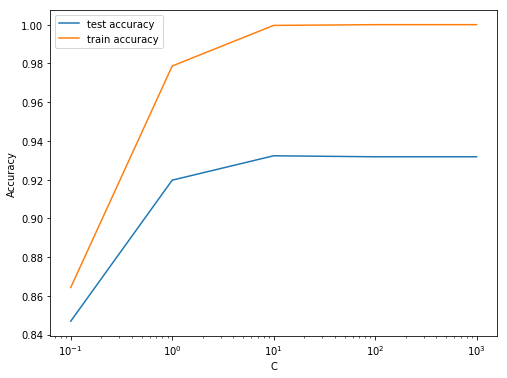

In [30]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to **overfit** the model. This is because a high C value aims to classify all training examples correctly (since C is the *cost of misclassification* - if you impose a high cost on the model, it will avoid misclassifying any points by overfitting the data). 

## C=10 is the optimum value as per graph

Let's finally look at the optimal C values found by GridSearchCV.

In [31]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.932312925170068 at C = 10


Let's now look at the metrics corresponding to C=10.

In [32]:
# model with the best value of C
model = SVC(C=best_C)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [33]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred,average='macro'))


# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average='macro'))

accuracy 0.9432539682539682
precision 0.9434485567334587
recall 0.9419280040586336


##### For C=10 , Accuracy is 94% 

## Optimising for Other Evaluation Metrics

In [34]:
# specify params
params = {"C": [0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric
    clf = GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    clf.fit(X_train, y_train)

    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.932312925170068 at C = {'C': 10}




### Thus via linear model we can get approx. 93 % accuracy. 

Let's try non-linear model too.

### Non Linear Model 

In [35]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [36]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9341269841269841 

[[261   0   0   0   0   1   2   4   1   0]
 [  0 276   0   0   1   0   0   0   0   0]
 [  1   0 223   2   1   0   3   5   5   0]
 [  0   1   6 244   0   8   0   4   3   2]
 [  0   1   6   0 252   0   0   4   0   4]
 [  2   1   1   7   2 210   6   5   0   3]
 [  0   1   1   0   0   0 240   4   1   0]
 [  1   3   5   1   2   0   1 233   0  10]
 [  0   2   4   5   0   5   4   4 215   2]
 [  0   0   2   5   3   0   0   8   0 200]]


The non-linear model gives approx. 92% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [37]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 47.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [38]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,52.611759,0.731121,6.462763,0.160559,1,0.01,"{'C': 1, 'gamma': 0.01}",0.715136,0.735544,0.748299,...,0.727211,0.013276,12,0.999787,0.999787,0.999787,0.999787,1.000000,0.999830,0.000085
1,14.917128,0.312611,3.992870,0.070891,1,0.001,"{'C': 1, 'gamma': 0.001}",0.923469,0.931973,0.929422,...,0.925510,0.005286,4,0.971088,0.971939,0.970451,0.970238,0.970876,0.970918,0.000592
2,21.110934,0.233276,5.111635,0.023205,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.906463,0.879252,0.890306,...,0.889456,0.012062,8,0.909226,0.910077,0.905825,0.908588,0.912840,0.909311,0.002268
3,51.372938,0.355761,6.212386,0.080356,10,0.01,"{'C': 10, 'gamma': 0.01}",0.729592,0.759354,0.766156,...,0.745238,0.016211,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,12.346499,0.211195,3.541503,0.074343,10,0.001,"{'C': 10, 'gamma': 0.001}",0.937925,0.934524,0.937075,...,0.934694,0.002965,1,0.998937,0.999150,0.998512,0.998937,1.000000,0.999107,0.000492
5,9.557078,0.146784,3.238624,0.074098,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.925170,0.924320,0.922619,...,0.922789,0.002369,5,0.956207,0.960247,0.958971,0.960034,0.961947,0.959481,0.001895
6,51.054612,0.187935,6.275403,0.089446,100,0.01,"{'C': 100, 'gamma': 0.01}",0.729592,0.759354,0.766156,...,0.745238,0.016211,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,12.399007,0.099094,3.555332,0.060684,100,0.001,"{'C': 100, 'gamma': 0.001}",0.934524,0.934524,0.937925,...,0.934184,0.003071,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,7.540966,0.158807,2.812435,0.094942,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.928571,0.923469,0.922619,...,0.922279,0.003826,6,0.995961,0.996599,0.995323,0.996173,0.997874,0.996386,0.000850
9,51.922553,0.489945,6.379250,0.130324,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.729592,0.759354,0.766156,...,0.745238,0.016211,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


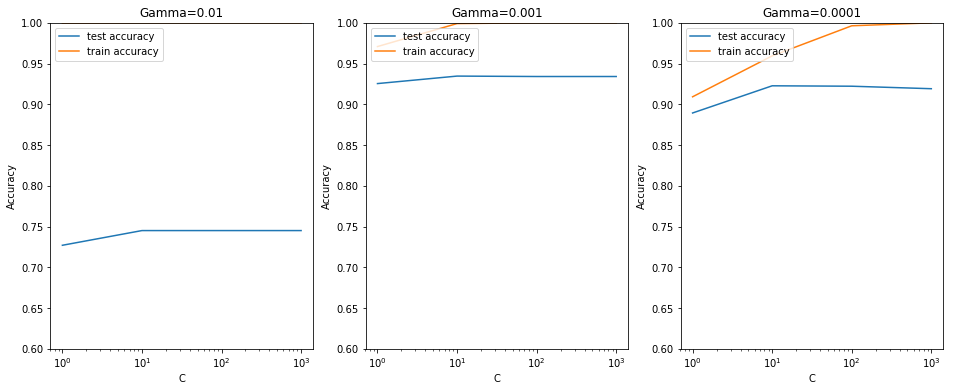

In [39]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


Let's now choose the best hyperparameters. 

 Best value for C= 10 and gamma is 0.001

In [40]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9346938775510204 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [41]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9392857142857143 

[[261   0   0   1   0   0   2   3   1   1]
 [  0 275   0   0   1   0   0   1   0   0]
 [  0   0 229   2   1   0   1   5   2   0]
 [  0   1   6 246   0   7   0   3   4   1]
 [  0   1   5   0 254   0   1   2   0   4]
 [  1   2   2   6   2 211   5   4   0   4]
 [  0   0   1   0   0   2 239   4   1   0]
 [  1   1   4   1   3   0   1 235   0  10]
 [  0   1   2   7   0   4   4   4 216   3]
 [  0   0   0   4   3   2   1   7   0 201]] 



## Conclusion
- In this case accuracy of non linear and linear model is 93% so both model did the good job . We can select non linear model with gammma = 0.001  with 93% Accuracy 